<a href="https://colab.research.google.com/github/Mart1Portfolio/ensai-apprentissage-profond/blob/main/notebooks/TP_1_1_%C3%A9nonc%C3%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Avant de d√©buter ce TP** :

1. **Changez le type d'ex√©cution sur Google Colab** : `Ex√©cution > Modifiez le type d'ex√©cution > T4 GPU`
2. **Installez les paquets ci-dessous** :

In [1]:
! pip install lightning torchmetrics torchinfo

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 828.5/828.5 kB 26.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 983.2/983.2 kB 38.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 832.4/832.4 kB 41.3 MB/s eta 0:00:00


# Introduction √† PyTorch et PyTorch-Lightning

Il existe de nombreuses biblioth√®ques et langages de programmation pour pratiquer de l'apprentissage profond. Au cours de ces travaux pratiques, nous utiliserons le langage de programmation Python, ainsi que le paquet [PyTorch](https://pytorch.org) et d'autres paquets de cet √©cosyst√®me.

L'objectif de ce Jupyter notebook est de vous fournir les bases pour d√©buter avec la biblioth√®que Pytorch. √Ä la fin de ce notebook, vous devez √™tre capables de :
* **travailler avec des tenseurs**,
* **indiquer comment acc√©der aux donn√©es pour entra√Æner et √©valuer un mod√®le**,
* **construire un r√©seau de neurones artificiels**, et
* **entra√Æner et √©valuer votre mod√®le**.

Le contenu de ce notebook est bas√© sur les [tutoriels](https://pytorch.org/tutorials/) disponibles sur le site de Pytorch.

## Tenseurs

Les tenseurs PyTorch suivent une structure de donn√©es sp√©cialis√©e et sont tr√®s similaires aux tableaux NumPy. Les tenseurs sont utilis√©s pour mod√©liser les entr√©es et les sorties d'un mod√®le, ainsi que les param√®tres du mod√®le.

Les tenseurs PyTorch sont similaires aux tableaux NumPy, une diff√©rence majeure √©tant que les tenseurs peuvent √™tre ex√©cut√©s sur des cartes graphiques (*graphical processing units* ou GPUs).
En fait, les tenseurs PyTorch et les tableaux NumPy peuvent m√™me partager le m√™me espace m√©moire, d'o√π l'absence de devoir copier les donn√©es.
Les tenseurs sont √©galement optimis√©s pour la [d√©rivation automatique](https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html).
Si vous √™tes familiers avec les tableaux NumPy, vous le serez rapidement √©galement avec les tenseurs PyTorch.

In [2]:
import torch
import numpy as np

### Initialiser un tenseur

In [3]:
# Directement √† partir de donn√©es "Python"
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

In [4]:
# √Ä partir d'un tableau NumPy
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]])

In [5]:
# √Ä partir d'un autre tenseur
x_ones = torch.ones_like(x_data)
x_ones

tensor([[1, 1],
        [1, 1]])

In [6]:
# Avec des valeurs al√©atoires ou une seule et unique valeur
shape = (2, 3)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Tenseur al√©atoire : \n {rand_tensor} \n")
print(f"Tenseur avec que des uns: \n {ones_tensor} \n")
print(f"Tenseur avec que des z√©ros : \n {zeros_tensor}")

Tenseur al√©atoire : 
 tensor([[0.7216, 0.1427, 0.5193],
        [0.7742, 0.7611, 0.1377]]) 

Tenseur avec que des uns: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Tenseur avec que des z√©ros : 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


### Attributs d'un tenseur

Les attributs d'un tenseur d√©crivent ses caract√©ristiques telles que sa forme, son type de donn√©es ou encore sur quel type d'appareil il est sauvegard√©.

In [7]:
tensor = torch.rand(3, 4)

print(f"Forme du tenseur : {tensor.shape}")
print(f"Type de donn√©es du tenseur : {tensor.dtype}")
print(f"Appareil sur lequel le tenseur est sauvegard√© : {tensor.device}")

Forme du tenseur : torch.Size([3, 4])
Type de donn√©es du tenseur : torch.float32
Appareil sur lequel le tenseur est sauvegard√© : cpu


**√Ä noter que le type de donn√©es par d√©faut d'un tenseur est `float32`, alors que le type par d√©faut d'un tableau NumPy est `float64`. PyTorch impose que tous les tenseurs aient le m√™me type de donn√©es pour effectuer des op√©rations entre eux.**

Vous pouvez changer le type de donn√©es d'un tenseur avec la m√©thode `to()` :

In [8]:
x_np.to(dtype=torch.float32)

tensor([[1., 2.],
        [3., 4.]])

### Op√©rations sur des tenseurs

De nombreuses op√©rations, telles que l'arithm√©tique, l'alg√®bre lin√©aire et des op√©rations matricielles (telles que la transpos√©e, l'indexation ou encore les coupes) sont d√©taill√©es dans la [documentation](https://pytorch.org/docs/stable/torch.html).

Chacune de ces op√©rations peut √™tre ex√©cut√©e sur GPU (en g√©n√©ral plus rapidement que sur CPU).
Sur Google Colab, changez le type d'ex√©cution (CPU ou GPU) relance le noyau, c'est-√†-dire qu'il faut ex√©cuter √† nouveau tout le code pr√©c√©demment ex√©cut√©.
**C'est pourquoi la premi√®re instruction de ce notebook, ainsi que de de tous les autres notebooks, est de changer le type d'ex√©cution et de choisir GPU au lieu de CPU.**
Les TPUs (pour [*Tensor Processing Units*](https://en.wikipedia.org/wiki/Tensor_Processing_Unit)) sont d'autres acc√©l√©rateurs mat√©riels, d√©velopp√©s par Google, mais nous ne les utiliserons pas.

Par d√©faut, les tenseurs sont cr√©√©s sur le CPU. Il faut explicitement d√©placer les tenseurs sur le GPU en utilisant la m√©thode `to()` (apr√®s avoir v√©rifi√© la disponibilit√© de GPUs). Gardez en t√™te que copier de grands tenseurs sur d'autres appareils peut √™tre co√ªteux √† la fois en terme de temps et de m√©moire.

In [9]:
# Exemple : d√©placer un tenseur sur un GPU s'il y en a un de disponible
if torch.cuda.is_available():
    tensor = tensor.to("cuda")

In [10]:
# Op√©rations d'indexation et de coupes (similaires aux tableaux NumPy)
tensor = torch.ones(4, 4)
print(f"Premi√®re ligne : {tensor[0]}")
print(f"Premi√®re colonne : {tensor[:, 0]}")
print(f"Derni√®re colonne : {tensor[..., -1]}")
tensor[:, 1] = 0  # Modification de la deuxi√®me colonne
print(tensor)

Premi√®re ligne : tensor([1., 1., 1., 1.])
Premi√®re colonne : tensor([1., 1., 1., 1.])
Derni√®re colonne : tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [11]:
# Concatenation de tenseurs (le long d'une dimension donn√©e)
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [15]:
# Op√©rations arithm√©tiques

## Trois mani√®res d'effectuer la multiplication matricielle
y1 = tensor @ tensor.T

y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3)

print("Votre tenseur", tensor)
print("le r√©sultat de la multiplication matricielle ", y3)

## Trois mani√®res d'effectuer la multiplication √©l√©ment par √©l√©ment
z1 = tensor * tensor

z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

print("le r√©sultat de la multiplication √©l√©ment par √©l√©ment", z3)

Votre tenseur tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
le r√©sultat de la multiplication matricielle  tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])
le r√©sultat de la multiplication √©l√©ment par √©l√©ment tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [16]:
# Tenseur √† un seul √©l√©ment et r√©cup√©ration de la valeur en un type natif de Python.
agg = tensor.sum()
print(agg, type(agg))

agg_item = agg.item()
print(agg_item, type(agg_item))

tensor(12.) <class 'torch.Tensor'>
12.0 <class 'float'>


## Jeu de donn√©es et chargeurs de donn√©es

L'acc√®s aux donn√©es est un √©l√©ment essentiel pour pouvoir entra√Æner des mod√®les. PyTorch met √† disposition deux outils qui permettent de faciliter l'acc√®s aux donn√©es : [`torch.utils.data.Dataset()`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) et [`torch.utils.data.DataLoader()`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader). Ces outils permettent de travailler √† la fois sur des jeux de donn√©es publics et tr√®s couramment utilis√©s, mais aussi sur son propre de jeu de donn√©es.

La classe [`torch.utils.data.Dataset()`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) permet de d√©finir un jeu de donn√©es, notamment sa taille (c'est-√†-dire son nombre d'observations) et comment acc√©der √† n'importe quelle observation.

La classe [`torch.utils.data.DataLoader()`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) permet de d√©finir, pour un jeu de donn√©es, un chargeur de donn√©es, notamment comment acc√©der √† plusieurs observations √† la fois, s'il faut m√©langer ou non l'ordre des observations, etc. Le chargeur de donn√©es est l'outil utilis√© pour l'entra√Ænement et l'√©valuation des mod√®les.

### Chargement d'un jeu de donn√©es couramment utilis√©

Certains jeux de donn√©es couramment utilis√©s peuvent √™tre facilement t√©l√©charg√©s gr√¢ce √† des outils fournis dans d'autres biblioth√®ques de l'√©cosyst√®me PyTorch telles que [TorchVision](https://pytorch.org/vision/stable/index.html), [TorchText](https://pytorch.org/text/stable/index.html) et [TorchAudio](https://pytorch.org/audio/stable/index.html).

Dans ce tutoriel, nous allons t√©l√©charger et utiliser le jeu de donn√©es [Fashion MNIST](https://en.wikipedia.org/wiki/Fashion_MNIST), consistu√© d'images de mode de taille `28 x 28`. Le jeu d'entra√Ænement est compos√© de 60 000 images, tandis que le jeu d'√©valuation est compos√© de 10 000 images. Le jeu de donn√©es est disponible via la classe [`torchvision.datasets.FashionMNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html#torchvision.datasets.FashionMNIST).

In [17]:
from torchvision import datasets
from torchvision.transforms import ToTensor


dataset_train = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

dataset_val = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 26.4M/26.4M [00:02<00:00, 12.0MB/s]
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 29.5k/29.5k [00:00<00:00, 202kB/s]
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4.42M/4.42M [00:01<00:00, 3.81MB/s]
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5.15k/5.15k [00:00<00:00, 28.1MB/s]


### It√©ration et visualisation du jeu de donn√©es

Une instance de la classe `Dataset` est indexable, comme une liste Python : `training_data[index]`.

Comme nos observations sont des images, nous allons visualiser certaines observations √† l'aide de la biblioth√®que `matplotlib`.

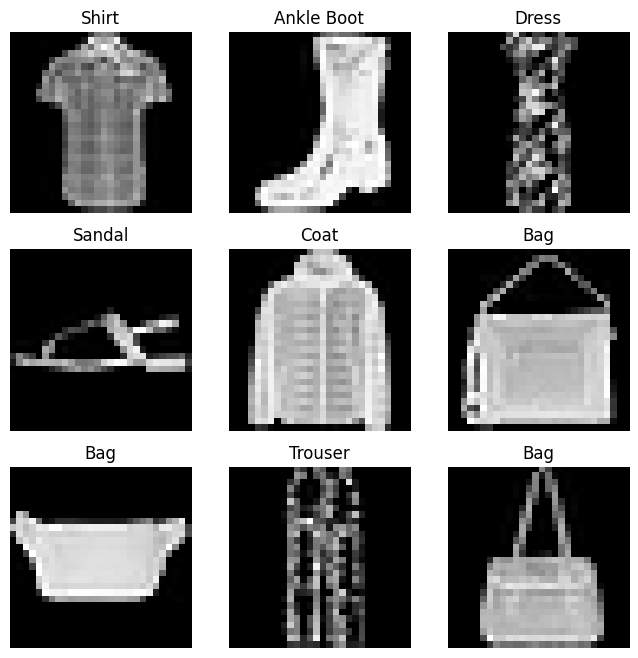

In [18]:
import matplotlib.pyplot as plt

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}


# Affichage de 9 observations du jeu d'entra√Ænement choisies al√©atoirement
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(dataset_train), size=(1,)).item()
    img, label = dataset_train[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### Travailler avec son propre jeu de donn√©es

#### Cas g√©n√©ral

En pratique, vous ne travaillerez pas sur un jeu de donn√©es public couramment utilis√© mais sur votre propre jeu de donn√©es. Il reste n√©anmoins possible d'utiliser certains outils mis √† disposition, √† condition de respecter certaines contraintes.

Si vous travaillez sur votre propre jeu de donn√©es, il va falloir d√©finir une classe h√©ritant de la classe [`torch.utils.data.Dataset()`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) qui d√©finit les trois m√©thodes suivantes :
* `__len__()` : cette m√©thode renvoie le nombre d'observations du jeu de donn√©es.
* `__getitem__()` : cette m√©thode charge et renvoie la n-i√®me observation du jeu de donn√©es (o√π n est un argument de la m√©thode)
* `__init__()` : cette m√©thode d√©finit toutes les informations n√©cessaires pour l'impl√©mentation des deux autres m√©thodes.

Vous trouverez [ici](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#creating-a-custom-dataset-for-your-files) un exemple tir√© de la documentation de PyTorch pour un jeu de donn√©es constitu√© d'images. Cet exemple est copi√©-coll√© ci-dessous. **Ce n'est qu'un exemple, il ne faut pas le copier-coller sans le comprendre.**


```python
import os
import pandas as pd
from torchvision.io import read_image
from torch.utils.data import Dataset


class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label
```

#### Cas avec des tenseurs d√©j√† charg√©s

Quand vos donn√©es sont d√©j√† charg√©es dans des tenseurs, une classe pratique est [`torch.utils.data.TensorDataset()`](https://pytorch.org/docs/stable/data.html#torch.utils.data.TensorDataset).
Il faut que la premi√®re dimension de chaque tenseur soit la dimension des observations.
Ensuite, il suffit de fournir les tenseurs en arguments du constructeur de cette classe : chaque observation sera r√©cup√©r√©e en indexant les tenseurs le long de la premi√®re dimension.

### Pr√©parer les donn√©es pour l'entra√Ænement avec le DataLoader

La classe `Dataset` permet de r√©cup√©rer n'importe quelle observation d'un jeu de donn√©es. Lors de l'entra√Ænement d'un mod√®le, on veut en g√©n√©ral acc√©der √† plusieurs observations √† la fois (en mini-lots) et m√©langer le jeu de donn√©es √† chaque √©poque pour r√©duire le surapprentissage.

Pour ce faire, on utilise la classe [`torch.utils.data.Dataloader()`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader). Son premier argument, obligatoire, est le jeu de donn√©es, c'est-√†-dire l'instance de la classe [`torch.utils.data.Dataset()`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset).
Les autres arguments importants, optionnels, sont la taille du lot (`batch_size`) et le fait de m√©langer ou non le jeu de donn√©es (`shuffle`). M√©langer le jeu de donn√©es pendant l'entra√Ænement peut √™tre utile pour √©viter le surapprentissage, mais c'est inutile pour l'√©valuation.

In [21]:
from torch.utils.data import DataLoader

dataloader_train = DataLoader(dataset_train, batch_size=100, shuffle=True)
dataloader_val = DataLoader(dataset_val, batch_size=100)

### It√©ration √† travers le `DataLoader`

On a charg√© le jeu de donn√©es et on peut it√©rer √† travers le jeu de donn√©es. En utilisant les fonctions natives [`iter()`](https://docs.python.org/fr/3/library/functions.html#iter) et [`next()`](https://docs.python.org/fr/3/library/functions.html#next), on peut acc√©der au prochain lot d'observations :

Taille du tenseur contenant les images du lot d'observations : torch.Size([100, 1, 28, 28])
Taille du tenseur contenant les labels du lot d'observations : torch.Size([100])


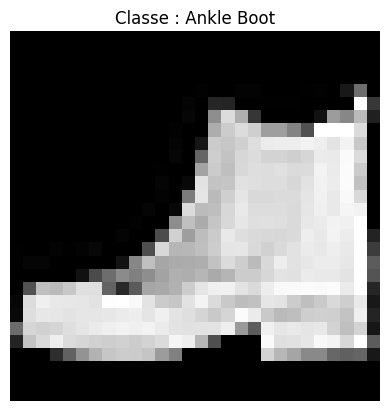

In [22]:
# Get the next mini-batch of samples
train_features, train_labels = next(iter(dataloader_train))
print(f"Taille du tenseur contenant les images du lot d'observations : {train_features.size()}")
print(f"Taille du tenseur contenant les labels du lot d'observations : {train_labels.size()}")

# Display the image and the label of the first sample in the mini-batch
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.title(f"Classe : {labels_map[label.item()]}")
plt.axis('off')
plt.show()

## Construire, entra√Æner et √©valuer un r√©seau de neurones artificiels avec PyTorch

### Construction d'un r√©seau de neurones avec PyTorch

Pour construire un r√©seau de neurones avec PyTorch, il y a quelques r√®gles simples √† respecter :

* Il faut d√©finir une classe h√©ritant de la classe [`torch.nn.Module()`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html).
* La classe doit contenir au moins les deux m√©thodes suivantes :

    + Le constructeur `__init__()`, o√π on appelle toujours le constructeur de la classe m√®re et o√π on initialise toutes les couches (et o√π on peut √©galement d√©finir les fonctions d'activation).
    + La m√©thode `forward()` qui d√©finit la passe avant, c'est-√†-dire comment passer de l'entr√©e √† la sortie.

Tous les √©l√©ments n√©cessaires pour d√©finir un r√©seau de neurones se trouvent dans le module [`torch.nn`](https://pytorch.org/docs/stable/nn.html), en particulier toutes les couches et fonctions d'activation.

Dans l'exemple ci-dessous, on d√©finit un r√©seau de neurones avec l'architecture s√©quentielle suivante :
1. une couche d'aplatissement, pour transformer une image en un vecteur,
2. une premi√®re couche lin√©aire avec $28 \times 28 = 784$ entr√©es et $512$ sorties,
3. la fonction d'activation ReLU,
4. une deuxi√®me couche lin√©aire avec $512$ entr√©es et $512$ sorties,
5. la fonction d'activation ReLU,
6. une troisi√®me couche lin√©aire avec $512$ entr√©es et $10$ sorties.

Vous remarquerez qu'on n'utilise pas la fonction d'activation $\text{softmax}$ pour transformer le dernier vecteur de 10 r√©els en un vecteur de probabilit√©s. En effet, la fonction $\text{softmax}$ utilise la fonction exponentielle et la fonction de co√ªt que nous allons utiliser, l'entropie crois√©e, utilise le logarithme des probabilit√©s. Il est donc plus simple (et c'est √©galement num√©riquement plus stable) de travailler directement avec les **logits** plut√¥t que les probabilit√©s.

In [24]:
class NeuralNetworkPyTorch(torch.nn.Module):
    def __init__(self):
        # On appelle toujours le constructeur de la classe m√®re
        super().__init__()

        # Convertit un tenseur multidimensionnel en un tenseur unidimensionnel
        self.flatten = torch.nn.Flatten()

        # Premi√®re couche lin√©aire
        self.linear1 = torch.nn.Linear(28 * 28, 512)

        # Premi√®re fonction d'activation
        self.relu1 = torch.nn.ReLU()

        # Deuxi√®me couche lin√©aire
        self.linear2 = torch.nn.Linear(512, 512)

        # Deuxi√®me fonction d'activation
        self.relu2 = torch.nn.ReLU()

        # Troisi√®me couche lin√©aire
        self.linear3 = torch.nn.Linear(512, 10)

    def forward(self, x):
        y = self.flatten(x)
        y = self.linear1(y)
        y = self.relu1(y)
        y = self.linear2(y)
        y = self.relu2(y)
        y = self.linear3(y)
        return y

Un inconv√©nient √©vident de l'approche est qu'on est oblig√©s d'appeler chaque couche et chaque fonction d'activation une par une. C'est non seulement √©nervant m√™me pour une architecture aussi petite, mais c'est en plus un risque d'erreur non n√©gligeable, surtout avec un r√©seau plus grand. Heureusement, dans le cas o√π une partie de l'architecture est s√©quentielle, on peut utiliser la classe [`torch.nn.Sequential()`]() pour indiquer la liste des couches et fonctions d'activation de la s√©quence. Quand on appele ensuite cet objet, la s√©quence est parcourue dans l'ordre fourni et on r√©cup√®re simplement la sortie de la s√©quence.

Le code ci-dessous illustre la simplification de la m√©thode `forward()` en utilisant cet outil.

In [25]:
class NeuralNetworkPyTorchSimpler(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.sequential = torch.nn.Sequential(
            torch.nn.Flatten(),
            torch.nn.Linear(28 * 28, 512),
            torch.nn.ReLU(),
            torch.nn.Linear(512, 512),
            torch.nn.ReLU(),
            torch.nn.Linear(512, 10),
        )

    def forward(self, x):
        return self.sequential(x)

On peut visualiser l'architecture de notre r√©seau de neurones en utilisant la fonction [`torchinfo.summary()`](https://github.com/TylerYep/torchinfo?tab=readme-ov-file#documentation). En lui fournissant √©galement la taille de l'entr√©e (en incluant la dimension pour le lot), on peut facilement visualiser la taille de la sortie de chaque couche.

In [26]:
from torchinfo import summary

model = NeuralNetworkPyTorchSimpler()
summary(model, input_size=(64, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
NeuralNetworkPyTorchSimpler              [64, 10]                  --
‚îú‚îÄSequential: 1-1                        [64, 10]                  --
‚îÇ    ‚îî‚îÄFlatten: 2-1                      [64, 784]                 --
‚îÇ    ‚îî‚îÄLinear: 2-2                       [64, 512]                 401,920
‚îÇ    ‚îî‚îÄReLU: 2-3                         [64, 512]                 --
‚îÇ    ‚îî‚îÄLinear: 2-4                       [64, 512]                 262,656
‚îÇ    ‚îî‚îÄReLU: 2-5                         [64, 512]                 --
‚îÇ    ‚îî‚îÄLinear: 2-6                       [64, 10]                  5,130
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 42.86
Input size (MB): 0.20
Forward/backward pass size (MB): 0.53
Params size (MB): 2.68
Estimated Total Size (MB): 3.41

### Appareil (*device*) sur lequel travailler

Par d√©faut, tous les tenseurs d√©finis sont mis sur les **unit√©s centrales de traitement** (CPU pour *central processing units* en anglais). Cependant, il existe d'autres unit√©s, telles que les **unit√©s de traitement graphique** (GPU pour *graphical processing units* en anglais), qui sont bien plus rapides pour effectuer certaines op√©rations math√©matiques, notamment celles n√©cessaires en apprentissage profond telles que le calcul matriciel.

**En gros, si vous utilisez des GPUs au lieu de CPUs, l'ex√©cution des passes avant et arri√®re sera, *en g√©n√©ral*, bien plus rapide : l'entra√Ænement et l'inf√©rence seront donc, *en g√©n√©ral*, bien plus rapides.**

Sur Google Colab, vous pouvez modifier les ressources auxquelles vous avez acc√®s en allant dans `Ex√©cution > Modifier le type d'ex√©cution` et en cliquant sur `T4 GPU` au lieu de `CPU`.
Modifier l'acc√©l√©rateur mat√©riel red√©marre votre noyau (c'est-√†-dire que vous perdez toutes les variables que aviez d√©finies et qu'il faut rex√©cuter le code depuis le d√©but).
**Il est donc important de choisir le type d'acc√©l√©rateur mat√©riel au tout d√©but afin de ne pas perdre le travail d√©j√† effectu√©.**

**CUDA** (pour *Compute Unified Device Architecture*) est une technologie permettant d'ex√©cuter des calculs sur un GPU √† la place d'un CPU.
C'est ce terme qui est utilis√© dans la biblioth√®que PyTorch.
Pour savour (ou v√©rifier) si vous avez acc√®s √† un GPU, on utilise la fonction [`torch.cuda.is_available()`](https://pytorch.org/docs/stable/generated/torch.cuda.is_available.html) :

In [27]:
device = torch.device(
    "cuda"
    if torch.cuda.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


**Il est n√©cessaire de tout mettre sur le m√™me appareil**. Par exemple, si on souhaite utiliser un GPU, alors il faut mettre le mod√®le sur le GPU mais aussi chaque lot d'observations sur le GPU pendant l'entra√Ænement et l'inf√©rence. On commence donc par mettre le mod√®le sur le GPU.

In [28]:
model = model.to(device)

**Pour effectuer la passe avant du mod√®le, on n'utilise pas directement pas la m√©thode `forward()` mais on appelle directement le mod√®le** (appeler le mod√®le effectue des op√©rations suppl√©mentaires).
Par exemple, avec le code ci-dessous :
1. On d√©finit ci-dessous une image o√π tous les pixels sont al√©atoires et on la met sur le bon appareil.
2. On effectue la passe avant pour obtenir les logits.
3. On obtient l'indice de la classe pr√©dite qui correspond √† l'indice du logit maximal.
4. On affiche le nom de la classe pr√©dite.

In [29]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
y_pred = logits.argmax(1)
print(f"Classe pr√©dite : {labels_map[y_pred.item()]}")
del X, logits, y_pred

Classe pr√©dite : Shirt


### Entra√Ænement et √©valuation

En utilisant uniquement le paquet PyTorch, il est n√©cessaire d'√©crire soi-m√™me le code pour l'entra√Ænement et l'√©valuation d'un mod√®le. N√©anmoins, on a d√©j√† d√©fini presque tous les √©l√©ments n√©cessaires pour l'entra√Ænement du mod√®le. Il nous reste √† d√©finir la fonction de co√ªt, l'algorithme d'optimisation ainsi que certains hyperparam√®tres tels que le nombre d'√©poques.

Le module [`torch.nn`](https://pytorch.org/docs/stable/nn.html) met √† disposition les diff√©rentes [fonctions de perte](https://pytorch.org/docs/stable/nn.html#loss-functions) d√©j√† impl√©ment√©es dans PyTorch. Pour les algorithmes d'optimisation, il faut utiliser le module [`torch.optim`](https://pytorch.org/docs/stable/optim.html).

* **Fonction de co√ªt** : comme nous travaillons sur un probl√®me de classification en classes multiples, nous allons utiliser l'*entropie crois√©e* : [`torch.nn.CrossEntropyLoss()`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html).
* **Algorithme d'optimisation** : nous allons utiliser l'algorithme *Adam*, qui est en g√©n√©ral un bon algorithme par d√©faut : [`torch.optim.Adam()`](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html).

√Ä noter qu'on a d√©j√† d√©finit des hyperparam√®tres sans forc√©ment s'en rendre compte, par exemple **la taille des lots** (`batch_size`) sur le jeu d'entra√Ænement √† travers le *dataloader* pour ce jeu. On utilise ici √©galement les valeurs par d√©faut des hyperparam√®tres pour l'algorithme Adam, mais on pourrait les changer.

En utilisant un nombre d'√©poques fixe, la proc√©dure g√©n√©rale d'entra√Ænement d'un mod√®le est la suivante :
```
Pour chaque √©poque
    Pour chaque lot du jeu d'entra√Ænement
        [Optionnel] Mettre les donn√©es sur le bon appareil (GPU)
        Effectuer la passe avant et calculer la fonction de co√ªt
        Effectuer la passe arri√®re (calculer les gradients)
        Effectuer une √©tape d'optimisation (misee √† jour des param√®tres entra√Ænables du mod√®le)
```

L'optimisation se d√©roule dans trois √©tapes de la boucle imbriqu√©e :
* La m√©thode `zero_grad()` de l'algorithme d'optimisation permet de r√©initialiser les gradients des param√®tres du mod√®le. Par d√©faut, les gradients s'accumulent au fil des it√©rations. Pour √©viter cette accumulation, il faut explicitement les r√©initialiser √† z√©ro au d√©but de chaque it√©ration.
* La passe arri√®re s'effectue gr√¢ce √† la m√©thode `backward()` de la fonction de perte. Ici, PyTorch calcule le gradient de la fonction de co√ªt par rapport √† chaque param√®tre entra√Ænable.
* La mise √† jour des param√®tres entra√Ænables du mod√®le s'effectue gr√¢ce √† la m√©thode `step()` de l'algorithme d'optimisation, √† partir des gradients calcul√©s durant la passe arri√®re.

Le code ci-dessous d√©finit trois fonctions :
* La fonction `train_loop()` correspond √† l'entra√Ænement du mod√®le pendant une √©poque sur le jeu d'entra√Ænement.
* La fonction `eval_loop()` correspond √† l'√©valuation d'un mod√®le sur un jeu de donn√©es.
* La fonction `train()` effectue l'entra√Ænement complet du mod√®le.

In [30]:
def train_loop(dataloader, model, loss_function, optimizer, device, verbose=False):
    # Met le mod√®le en mode entra√Ænement.
    # C'est une bonne pratique √† avoir car certaines couches ne se comportent
    # pas de la m√™me mani√®re durant l'entra√Ænement et l'inf√©rence.
    # Ici, cela n'a aucun impact car toutes les couches se comportent de la m√™me mani√®re.
    model.train()

    loss_mean, accuracy_mean = 0.0, 0.0

    # Pour chaque lot
    for batch, (X, y) in enumerate(dataloader):

        # R√©initialise les gradients √† z√©ro
        optimizer.zero_grad()

        # Met le lot d'observations sur le bon appareil
        X = X.to(device)
        y = y.to(device)

        # Effectue la passe avant et calcule la fonction de co√ªt
        pred = model(X)
        loss = loss_function(pred, y)
        accuracy = (pred.argmax(1) == y).to(torch.float).mean().item()

        loss_mean += loss.item()
        accuracy_mean += accuracy

        # Effectue la passe arri√®re et met √† jour les param√®tres du mod√®le
        loss.backward()
        optimizer.step()

        # Affiche la valeur de la fonction de co√ªt pour certains lots
        if verbose and (batch % (len(dataloader) // 10) == 0):
            loss = loss.item()
            print(
                f"Fonction de co√ªt = {loss: >7f} ; "
                f"Pr√©cision = {accuracy:06.2%} "
                f"[{batch: >3d} / {len(dataloader): >3d}]"
            )

    loss_mean /= len(dataloader)
    accuracy_mean /= len(dataloader)

    return loss_mean, accuracy_mean


def eval_loop(dataloader, model, loss_function, device):

    # Met le mod√®le en mode √©valuation.
    # C'est une bonne pratique √† avoir car certaines couches ne se comportent
    # pas de la m√™me mani√®re durant l'entra√Ænement et l'inf√©rence.
    # Ici, cela n'a aucun impact car toutes les couches se comportent de la m√™me mani√®re.
    model.eval()

    # D√©finit des variables n√©cessaires pour l'√©valuation du mod√®le
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    loss, correct = 0.0, 0.0

    # √âvaluer le mod√®le dans un contexte `with torch.no_grad()` assure qu'aucun gradient
    # n'est calcul√© pendant l'√©valuation, ce qui √©vite des calculs inutiles.
    with torch.no_grad():

        # Pour chaque lot
        for X, y in dataloader:

            # Met le lot d'observations sur le bon appareil
            X = X.to(device)
            y = y.to(device)

            # Effectue la passe avant
            pred = model(X)

            # Calcule la fonction de co√ªt et le nombre de bonnes pr√©dictions
            loss += loss_function(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    # Calcule la fonction de co√ªt moyenne et la proportion de bonnes pr√©dictions
    loss /= num_batches
    correct /= size
    return loss, correct


def train(model, dataloader_train, dataloader_val, loss_function, optimizer, n_epochs, device, verbose=True):
    for epoch in range(n_epochs):
        string = f"√âpoque {epoch + 1:{len(str(n_epochs))}d} / {n_epochs}"
        print(f"{string}\n{'-' * len(string)}")
        print(" Jeu d'entra√Ænement ".center(54 + 2 * len(str(len(dataloader_train))) , '#'))

        # Training loop
        loss_train, accuracy_train = train_loop(
            dataloader_train, model, loss_function, optimizer, device, verbose
        )
        print(f"Fonction de co√ªt = {loss_train: >7f} ; Pr√©cision = {accuracy_train:06.2%} [Moyenne]")

        # Evaluation loop
        loss_val, accuracy_val = eval_loop(dataloader_val, model, loss_function, device)
        print(" Jeu de validation ".center(54 + 2 * len(str(len(dataloader_train))), '#'))
        print(f"Fonction de co√ªt = {loss_val: >8f} ; Pr√©cision = {(accuracy_val):06.2%}\n")


    print("Entra√Ænement termin√© !")

On utilise la fonction `train()` pour entra√Æner le mod√®le pendant 5 √©poques.

In [31]:
train(
    model=model,
    dataloader_train=dataloader_train,
    dataloader_val=dataloader_val,
    loss_function=torch.nn.CrossEntropyLoss(),
    optimizer=torch.optim.Adam(model.parameters()),
    n_epochs=5,
    device=device,
    verbose=True
)

√âpoque 1 / 5
------------
#################### Jeu d'entra√Ænement ####################
Fonction de co√ªt = 2.305467 ; Pr√©cision = 10.00% [  0 / 600]
Fonction de co√ªt = 0.671197 ; Pr√©cision = 77.00% [ 60 / 600]
Fonction de co√ªt = 0.515950 ; Pr√©cision = 81.00% [120 / 600]
Fonction de co√ªt = 0.551412 ; Pr√©cision = 78.00% [180 / 600]
Fonction de co√ªt = 0.415397 ; Pr√©cision = 83.00% [240 / 600]
Fonction de co√ªt = 0.324659 ; Pr√©cision = 89.00% [300 / 600]
Fonction de co√ªt = 0.375775 ; Pr√©cision = 82.00% [360 / 600]
Fonction de co√ªt = 0.274428 ; Pr√©cision = 92.00% [420 / 600]
Fonction de co√ªt = 0.357472 ; Pr√©cision = 89.00% [480 / 600]
Fonction de co√ªt = 0.389329 ; Pr√©cision = 84.00% [540 / 600]
Fonction de co√ªt = 0.503355 ; Pr√©cision = 81.67% [Moyenne]
#################### Jeu de validation #####################
Fonction de co√ªt = 0.413371 ; Pr√©cision = 84.88%

√âpoque 2 / 5
------------
#################### Jeu d'entra√Ænement ####################
Fonction de co√ªt 

Comme vous pouvez le constater, entra√Æner un mod√®le avec PyTorch n√©cessite d'√©crire pas mal de code.
N√©anmoins, on se rend compte que l'on √©crit tr√®s souvent des bouts de code quasiment identiques sur diff√©rents projets, surtout lorsqu'on effectue des choses classiques.
On va donc voir une autre biblioth√®que qui va nous permettre de ne pas r√©√©crire toujours le m√™me code √† chaque fois.

## Construire, entra√Æner et √©valuer un r√©seau de neurones artificiels avec PyTorch-Lightning

### Les bases

Une caract√©ristique de PyTorch est qu'il s'agit d'une biblioth√®que relativement *low-level* : certaines fonctionnalit√©s doivent √™tre impl√©ment√©es par l'utilisateur √† partir des outils mis √† disposition. Par exemple, pour l'entra√Ænement, il faut √† chaque fois √©crire le code complet de la proc√©dure.
√Ä l'inverse, dans des biblioth√®ques comme [scikit-learn](https://scikit-learn.org) en Python ou [caret](https://cran.r-project.org/web/packages/caret/index.html) en R, vous n'avez besoin que d'appeler la m√©thode `.fit()` ou la fonction `train()` pour effectuer l'entra√Ænement.
Certains hyperparam√®tres vous permettent d'effectuer des modifications sur comment est entra√Æn√© le mod√®le, mais vous n'avez pas √† impl√©menter vous-m√™me l'entra√Ænement.

Cet aspect *low-level* de PyTorch peut √™tre pratique pour des travaux de recherche parce qu'on souhaite en g√©n√©ral avoir acc√®s √† toutes les fonctionnalit√©s pour pouvoir effectuer des modifications si n√©cessaires.
Cela l'est moins quand on veut juste utiliser une version classique de l'entra√Ænement.

Pour ce faire, nous allons √©galement utiliser une autre bilbioth√®que Python appel√©e [PyTorch Lightning](https://lightning.ai/pytorch-lightning), qui va nous permettre d'√©viter d'√©crire une partie du code pour l'entra√Ænement et l'√©valuation du mod√®le.

**Tout se fait dans une seule classe, d√©finie par l'utilisateur, qui doit respecter les conventions suivantes** :
* La classe h√©rite de la classe [`lightning.LightningModule()`](https://lightning.ai/docs/pytorch/stable/common/lightning_module.html#lightningmodule).
* Le constructeur fait appel au constructeur de la classe m√®re.
* **M√©thode ``__init__()``** : Toutes les couches avec des param√®tres entra√Ænables sont initialis√©es dans le constructeur. Pour √©viter de se demander, en cas de doute, si une couche a des param√®tres entra√Ænables ou non, autant initialiser toutes les couches et toutes les fonctions d'activation dans le constructeur. Toutes les couches et fonctions d'activation que nous utiliserons sont d√©finies dans le sous-module [`torch.nn`](https://pytorch.org/docs/stable/nn.html).
* **M√©thode ``forward()``** : Elle d√©finit comment effectuer une passe avant, c'est-√†-dire comment passer de l'entr√©e √† la sortie du r√©seaux de neurones. Cependant, pour effectuer une passe avant, on n'appelle jamais directement la m√©thode `forward()` mais on appelle directement l'objet : `self()`.
* **M√©thode ``training_step()``** : elle d√©finit comment effectuer une √©tape d'entra√Ænement, c'est-√†-dire comment passer d'un lot (*batch*) d'observations √† la fonction de co√ªt correspondant √† ce lot d'observations.
* **M√©thode ``configure_optimizers()``** : elle d√©finit l'algorithme d'optimisation √† utiliser. Il doit s'agir d'un des algorithmes impl√©ment√©s dans le sous-module [`torch.optim`](https://pytorch.org/docs/stable/optim.html#algorithms).

Le code ci-dessous d√©finit un perceptron multicouche √† deux couches cach√©es (o√π les images sont d'abord transform√©es en vecteurs gr√¢ce √† la couche `nn.Flatten()`), entra√Æn√© par l'algorithme d'optimisation Adam avec l'entropie crois√©e comme fonction de co√ªt :

In [32]:
import lightning as L


class NeuralNetworkLightning(L.LightningModule):  # La classe h√©rite de la classe lightning.LightningModule
    def __init__(self):
        """Constructeur.

        Dans le constructeur, on ex√©cute le constructeur de la clase m√®re et on d√©finit
        toutes les couches et fonctions d'activation de notre r√©seau de neurones.
        """
        super().__init__()  # Toujours ex√©cuter le constructeur de la classe m√®re

        # Initialisation de la s√©quence de couches et de fonctions d'activation
        self.sequential = torch.nn.Sequential(
            torch.nn.Flatten(),
            torch.nn.Linear(28 * 28, 512),
            torch.nn.ReLU(),
            torch.nn.Linear(512, 512),
            torch.nn.ReLU(),
            torch.nn.Linear(512, 10),
        )

        # D√©finition de la fonction de perte
        self.loss = torch.nn.CrossEntropyLoss()

    def forward(self, x):
        """Impl√©mente la passe avant.

        L'argument x est un tenseur correspondant soit √† l'entr√©e une seule
        observation soit aux entr√©es d'un lot d'observations.
        """
        return self.sequential(x)

    def training_step(self, batch):
        """Effectue une √©tape d'entra√Ænement.

        Une √©tape consiste √† passer d'un lot d'observations (l'argument batch)
        √† l'√©valuation de la fonction de co√ªt pour ce lot d'observations.
        """
        X, y = batch  # X correspond aux images, y aux classes
        logits = self(X)  # Passe avant, qui renvoie les logits
        loss = self.loss(logits, y)  # √âvaluation de la fonction de co√ªt
        return loss

    def configure_optimizers(self):
        """Configure l'algorithme d'optimisation √† utiliser."""
        optimizer = torch.optim.Adam(self.parameters())
        return optimizer

On peut toujours visualiser l'architecture de notre r√©seau de neurones en utilisant la fonction [`torchinfo.summary()`](https://github.com/TylerYep/torchinfo?tab=readme-ov-file#documentation). En lui fournissant √©galement la taille de l'entr√©e (en incluant la dimension pour le lot), on peut facilement visualiser la taille de la sortie de chaque couche.

In [33]:
from torchinfo import summary


model = NeuralNetworkLightning()
summary(model, input_size=(64, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
NeuralNetworkLightning                   [64, 10]                  --
‚îú‚îÄSequential: 1-1                        [64, 10]                  --
‚îÇ    ‚îî‚îÄFlatten: 2-1                      [64, 784]                 --
‚îÇ    ‚îî‚îÄLinear: 2-2                       [64, 512]                 401,920
‚îÇ    ‚îî‚îÄReLU: 2-3                         [64, 512]                 --
‚îÇ    ‚îî‚îÄLinear: 2-4                       [64, 512]                 262,656
‚îÇ    ‚îî‚îÄReLU: 2-5                         [64, 512]                 --
‚îÇ    ‚îî‚îÄLinear: 2-6                       [64, 10]                  5,130
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 42.86
Input size (MB): 0.20
Forward/backward pass size (MB): 0.53
Params size (MB): 2.68
Estimated Total Size (MB): 3.41

Il nous reste maintenant √† d√©finir une instance de la classe [`lightning.Trainer()`](https://lightning.ai/docs/pytorch/stable/common/trainer.html) pour d√©finir des hyperparam√®tres de l'entra√Ænement (comme par exemple le nombre maximum d'√©poques), puis d'utiliser la m√©thode `.fit()` pour entra√Æner notre mod√®le sur un jeu de donn√©es (d√©fini par un *dataloader*).

In [ ]:
trainer = L.Trainer(max_epochs=5)
trainer.fit(model=model, train_dataloaders=dataloader_train)

üí° Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/johannfaouzi/anaconda3/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/logger_connector/logger_connector.py:76: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `lightning.pytorch` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default

  | Name       | Type             | Params | Mode 
--------------------------------------------------------
0 | sequential | Sequenti

Training: |                                                                                                   ‚Ä¶

`Trainer.fit` stopped: `max_epochs=5` reached.


On peut effectuer les remarques suivantes :

* On n'a pas besoin de r√©√©crire tous les boucles `for` : PyTorch Lightning s'en occupe lui-m√™me.

* Le code est mieux organis√© : les diff√©rentes √©tapes sont d√©finies √† travers des m√©thodes sp√©cifiques de la classe.

* On n'a pas besoin d'indiquer le type d'appareil (CPU ou GPU) sur lequel on souhaite travailler. C'est un des avantages de PyTorch Lightning : il s'occupe automatiquement de mettre le mod√®le et les donn√©es sur le GPU s'il y en a de disponible. C'est le comportement par d√©faut, il est bien s√ªr possible de le changer.

* Un dossier `lightning_logs` a √©t√© cr√©√© dans le r√©pertoire courant. En effet, PyTorch Lightning sauvegarde par d√©faut certaines informations de l'entra√Ænement. On peut bien entendu personnaliser ce qui est sauvegard√© dans ces registres.

* Une barre indique la progression de l'entra√Ænement, mais aucune statistique (fonction de perte, pr√©cision) n'est affich√©e pour suivre la *qualit√©* de l'entra√Ænement.

Nous allons utiliser des r√©glages avanc√©s de PyTorch Lightning pour combler ces manques. Le gain en termes de code sera donc plus limit√© que dans cette version initiale basique, mais les r√©sultats obtenus seront plus lisibles et plus faciles √† analyser.

### R√©glages avanc√©s

On a r√©ussi √† entra√Æner notre mod√®le pendant plusieurs √©poques, mais on n'a aucune information sur la qualit√© de l'entra√Ænement :

* Est-ce que le mod√®le a converg√© ?
* Quel est la valeur de la fonction de co√ªt √† la fin de l'entra√Ænement ?
* √Ä quelle performance peut-on s'attendre de la part de ce mod√®le entra√Æn√© ?

Heureusement, PyTorch Lightning est tr√®s flexible et nous permet de personnaliser l'entra√Ænement, notamment pour **afficher** et **enregistrer** des informations pertinentes de l'entra√Ænement. On va effectuer les modifications suivantes :

* On va rajouter une **√©tape de validation**, c'est-√†-dire qu'√† la fin de chaque √©poque, on va √©valuer notre mod√®le sur un jeu de validation (diff√©rent du jeu d'entra√Ænement). Cela nous permet d'√©valuer notre mod√®le sur un jeu de donn√©es ind√©pendant du jeu d'entra√Ænement.
* On va **afficher davantage d'informations au cours de l'entra√Ænement**, notamment la valeur de la fonction de co√ªt pour certains lots d'observations √† intervalle r√©gulier. Cela nous permet de v√©rifier que la fonction de co√ªt (en g√©n√©ral) diminue bien au cours de l'entra√Ænement et de d√©tecter √©ventuellement du surapprentissage (si la fonction de co√ªt est bien plus faible sur le jeu d'entra√Ænement que le jeu de validation).
* On va supprimer les √©ventuels avertissements affich√©s par Lightning, qui s'affichent entre les informations que l'on a d√©cid√© d'afficher.
* Par d√©faut, Lightning enregistre des informations li√©es √† l'entra√Ænement dans un dossier `lightning_logs` pour √™tre visualis√©es avec [TensorBoard](https://www.tensorflow.org/tensorboard?hl=fr). Nous allons utiliser un autre enregistreur, [`CSVLogger()`](https://lightning.ai/docs/pytorch/stable/extensions/generated/lightning.pytorch.loggers.CSVLogger.html), qui va enregistrer ces informations dans un fichier CSV que l'on pourra facilement lire pour visualiser les r√©sultats.

Il est n√©cessaire d'utiliser les noms des m√©thodes sp√©cifiques √† chaque op√©ration. Les nouvelles m√©thodes d√©finies sont les suivantes :
* `validation_step()` : effectue une √©tape de validation.
* `test_step()` : effectue une √©tape d'√©valuation.
* `on_train_start()` : ex√©cut√©e au d√©but de l'entra√Ænement, on l'utilise ici pour afficher la version du mod√®le.
* `on_train_epoch_end()` : ex√©cut√©e au d√©but de chaque √©poque sur le jeu d'entra√Ænement, on l'utilise ici pour afficher des informations √† la fin de chaque √©poque.

Les √©poques sont ex√©cut√©es en alternance sur le jeu d'entra√Ænement et sur le jeu de validation, en commen√ßant par le jeu d'entra√Ænement.
La m√©thode `fit()` effectue donc les op√©rations suivantes :
* √âpoque 1 sur le jeu d'entra√Ænement
* √âpoque 1 sur le jeu de validation
* √âpoque 2 sur le jeu d'entra√Ænement
* √âpoque 2 sur le jeu de validation
* etc.

In [36]:
# Suppression des messages d'information affich√©s par PyTorch Lightning
import logging
logging.getLogger("lightning").setLevel(logging.ERROR)
logging.getLogger("lightning.pytorch.utilities.rank_zero").setLevel(logging.WARNING)
logging.getLogger("lightning.pytorch.accelerators.cuda").setLevel(logging.WARNING)

# Suppression des avertissements li√©s aux dataloaders
import warnings
warnings.filterwarnings("ignore", ".*does not have many workers.*")
warnings.filterwarnings("ignore", ".*Missing logger folder.*")


from torchmetrics import Accuracy


class NeuralNetworkLightningAdvanced(L.LightningModule):  # La classe h√©rite de la classe lightning.LightningModule

    def __init__(self):
        """Constructeur.

        Dans le constructeur, on ex√©cute le constructeur de la clase m√®re et on d√©finit
        toutes les couches et fonctions d'activation de notre r√©seau de neurones.
        """
        super().__init__()  # Toujours ex√©cuter le constructeur de la classe m√®re

        # Initialisation de la s√©quence de couches et de fonctions d'activation
        self.sequential = torch.nn.Sequential(
            torch.nn.Flatten(),
            torch.nn.Linear(28 * 28, 512),
            torch.nn.ReLU(),
            torch.nn.Linear(512, 512),
            torch.nn.ReLU(),
            torch.nn.Linear(512, 10),
        )

        # Initialisation de la fonction de perte
        self.loss = torch.nn.CrossEntropyLoss()

        # Initialisation des m√©triques
        # IMPORTANT : il faut cr√©er une instance pour chaque jeu car la m√©trique
        # accumule les r√©sultats interm√©diaires calcul√©s sur chaque lot.
        self.accuracy_train = Accuracy(task="multiclass", num_classes=10)
        self.accuracy_val = Accuracy(task="multiclass", num_classes=10)
        self.accuracy_test = Accuracy(task="multiclass", num_classes=10)

    def forward(self, x):
        """Impl√©mente la passe avant.

        L'argument x est un tenseur correspondant soit √† l'entr√©e une seule
        observation soit aux entr√©es d'un lot d'observations.
        """
        return self.sequential(x)

    def step(self, batch, dataset):
        """Effectue une √©tape.

        Une √©tape consiste √† passer d'un lot d'observations (l'argument batch)
        √† l'√©valuation de la fonction de co√ªt pour ce lot d'observations.

        Parameters
        ----------
        batch : tuple
            Un lot d'observations. Le premier √©l√©ment du tuple est le lot
            des entr√©es, le second est le lot des labels.

        dataset : {"training", "validation", "test"}
            Jeu de donn√©es utilis√©.

        Returns
        -------
        loss : Tensor, shape = (1,)
            La fonction de co√ªt pour ce lot d'observations.
        """
        X, y = batch  # X correspond aux images, y aux classes
        logits = self(X)  # Passe avant, qui renvoie les logits
        loss = self.loss(logits, y)  # √âvaluation de la fonction de co√ªt
        y_pred = logits.argmax(1)  # Pr√©dictions du mod√®le

        if dataset == "training":
            metric = self.accuracy_train
            name = "train"
            bar_step = True
        elif dataset == "validation":
            metric = self.accuracy_val
            name = "val"
            bar_step = False
        else:
            metric = self.accuracy_test
            name = "test"
            bar_step = False

        acc = metric(y_pred, y)  # √âvaluation de la m√©trique
        self.log(f"loss_{name}", loss, prog_bar=bar_step, on_step=bar_step, on_epoch=True)
        self.log(f"accuracy_{name}", acc, prog_bar=bar_step, on_step=bar_step, on_epoch=True)

        return loss

    def training_step(self, batch):
        """Effectue une √©tape d'entra√Ænement."""
        return self.step(batch, "training")

    def validation_step(self, batch):
        """Effectue une √©tape de validation."""
        return self.step(batch, "validation")

    def test_step(self, batch):
        """Effectue une √©tape d'√©valuation."""
        return self.step(batch, "test")

    def on_train_start(self):
        """Code ex√©cut√© au d√©but de l'entra√Ænement."""
        string = f"Version {self.trainer.logger.version}"
        print(f"{string}\n{'=' * len(string)}\n")

    def on_train_epoch_end(self):
        """Code ex√©cut√© √† la fin de chaque √©poque d'entra√Ænement."""
        metrics = self.trainer.callback_metrics
        string = (f"""
            √âpoque {self.trainer.current_epoch + 1} / {self.trainer.max_epochs}
            -------------------------------------------------
            |     Jeu      | Fonction de perte | Exactitude |
            | ------------ | ----------------- | ---------- |
            | Entra√Ænement |{metrics['loss_train'].item():^19.5f}|{metrics['accuracy_train'].item():^12.3%}|
            |  Validation  |{metrics['loss_val'].item():^19.5f}|{metrics['accuracy_val'].item():^12.3%}|
            -------------------------------------------------
        """)
        string = '\n'.join([line.strip() for line in string.strip().split('\n')])
        print(string, "\n")

    def configure_optimizers(self):
        """Configure l'algorithme d'optimisation √† utiliser."""
        optimizer = torch.optim.Adam(self.parameters())
        return optimizer

In [37]:
from lightning.pytorch.callbacks import TQDMProgressBar
from lightning.pytorch.loggers import CSVLogger


model = NeuralNetworkLightningAdvanced()

trainer = L.Trainer(
    max_epochs=20,
    enable_model_summary=False,  # supprimer le r√©sum√© du mod√®le
    logger=CSVLogger('.'),  # sauvegarder les r√©sultats dans un fichier CSV
    num_sanity_val_steps=0,  # ne pas effectuer d'√©tape de validation avant l'entra√Ænement
    callbacks=[TQDMProgressBar(refresh_rate=100)]  # mettre √† jour la barre de progression tous les 100 lots
)

trainer.fit(
    model=model,
    train_dataloaders=dataloader_train,
    val_dataloaders=dataloader_val
)

Training: |          | 0/? [00:00<?, ?it/s]

Version 1



Validation: |          | 0/? [00:00<?, ?it/s]

√âpoque 1 / 20
-------------------------------------------------
|     Jeu      | Fonction de perte | Exactitude |
| ------------ | ----------------- | ---------- |
| Entra√Ænement |      0.50402      |  81.833%   |
|  Validation  |      0.40105      |  85.750%   |
------------------------------------------------- 



Validation: |          | 0/? [00:00<?, ?it/s]

√âpoque 2 / 20
-------------------------------------------------
|     Jeu      | Fonction de perte | Exactitude |
| ------------ | ----------------- | ---------- |
| Entra√Ænement |      0.36266      |  86.720%   |
|  Validation  |      0.36395      |  86.880%   |
------------------------------------------------- 



Validation: |          | 0/? [00:00<?, ?it/s]

√âpoque 3 / 20
-------------------------------------------------
|     Jeu      | Fonction de perte | Exactitude |
| ------------ | ----------------- | ---------- |
| Entra√Ænement |      0.32508      |  87.943%   |
|  Validation  |      0.36039      |  87.040%   |
------------------------------------------------- 



Validation: |          | 0/? [00:00<?, ?it/s]

√âpoque 4 / 20
-------------------------------------------------
|     Jeu      | Fonction de perte | Exactitude |
| ------------ | ----------------- | ---------- |
| Entra√Ænement |      0.29718      |  88.877%   |
|  Validation  |      0.36702      |  86.790%   |
------------------------------------------------- 



Validation: |          | 0/? [00:00<?, ?it/s]

√âpoque 5 / 20
-------------------------------------------------
|     Jeu      | Fonction de perte | Exactitude |
| ------------ | ----------------- | ---------- |
| Entra√Ænement |      0.28105      |  89.560%   |
|  Validation  |      0.34598      |  87.700%   |
------------------------------------------------- 



Validation: |          | 0/? [00:00<?, ?it/s]

√âpoque 6 / 20
-------------------------------------------------
|     Jeu      | Fonction de perte | Exactitude |
| ------------ | ----------------- | ---------- |
| Entra√Ænement |      0.26693      |  90.012%   |
|  Validation  |      0.33188      |  88.210%   |
------------------------------------------------- 



Validation: |          | 0/? [00:00<?, ?it/s]

√âpoque 7 / 20
-------------------------------------------------
|     Jeu      | Fonction de perte | Exactitude |
| ------------ | ----------------- | ---------- |
| Entra√Ænement |      0.24856      |  90.568%   |
|  Validation  |      0.32431      |  88.630%   |
------------------------------------------------- 



Validation: |          | 0/? [00:00<?, ?it/s]

√âpoque 8 / 20
-------------------------------------------------
|     Jeu      | Fonction de perte | Exactitude |
| ------------ | ----------------- | ---------- |
| Entra√Ænement |      0.24064      |  90.737%   |
|  Validation  |      0.32526      |  88.560%   |
------------------------------------------------- 



Validation: |          | 0/? [00:00<?, ?it/s]

√âpoque 9 / 20
-------------------------------------------------
|     Jeu      | Fonction de perte | Exactitude |
| ------------ | ----------------- | ---------- |
| Entra√Ænement |      0.22788      |  91.387%   |
|  Validation  |      0.30647      |  89.050%   |
------------------------------------------------- 



Validation: |          | 0/? [00:00<?, ?it/s]

√âpoque 10 / 20
-------------------------------------------------
|     Jeu      | Fonction de perte | Exactitude |
| ------------ | ----------------- | ---------- |
| Entra√Ænement |      0.21647      |  91.778%   |
|  Validation  |      0.31188      |  89.200%   |
------------------------------------------------- 



Validation: |          | 0/? [00:00<?, ?it/s]

√âpoque 11 / 20
-------------------------------------------------
|     Jeu      | Fonction de perte | Exactitude |
| ------------ | ----------------- | ---------- |
| Entra√Ænement |      0.20874      |  92.170%   |
|  Validation  |      0.32699      |  89.000%   |
------------------------------------------------- 



Validation: |          | 0/? [00:00<?, ?it/s]

√âpoque 12 / 20
-------------------------------------------------
|     Jeu      | Fonction de perte | Exactitude |
| ------------ | ----------------- | ---------- |
| Entra√Ænement |      0.20170      |  92.302%   |
|  Validation  |      0.32603      |  88.380%   |
------------------------------------------------- 



Validation: |          | 0/? [00:00<?, ?it/s]

√âpoque 13 / 20
-------------------------------------------------
|     Jeu      | Fonction de perte | Exactitude |
| ------------ | ----------------- | ---------- |
| Entra√Ænement |      0.18933      |  92.750%   |
|  Validation  |      0.34244      |  88.650%   |
------------------------------------------------- 



Validation: |          | 0/? [00:00<?, ?it/s]

√âpoque 14 / 20
-------------------------------------------------
|     Jeu      | Fonction de perte | Exactitude |
| ------------ | ----------------- | ---------- |
| Entra√Ænement |      0.18166      |  92.997%   |
|  Validation  |      0.32304      |  89.390%   |
------------------------------------------------- 



Validation: |          | 0/? [00:00<?, ?it/s]

√âpoque 15 / 20
-------------------------------------------------
|     Jeu      | Fonction de perte | Exactitude |
| ------------ | ----------------- | ---------- |
| Entra√Ænement |      0.17674      |  93.183%   |
|  Validation  |      0.34442      |  89.210%   |
------------------------------------------------- 



Validation: |          | 0/? [00:00<?, ?it/s]

√âpoque 16 / 20
-------------------------------------------------
|     Jeu      | Fonction de perte | Exactitude |
| ------------ | ----------------- | ---------- |
| Entra√Ænement |      0.17049      |  93.487%   |
|  Validation  |      0.33835      |  89.240%   |
------------------------------------------------- 



Validation: |          | 0/? [00:00<?, ?it/s]

√âpoque 17 / 20
-------------------------------------------------
|     Jeu      | Fonction de perte | Exactitude |
| ------------ | ----------------- | ---------- |
| Entra√Ænement |      0.16052      |  93.803%   |
|  Validation  |      0.33944      |  89.590%   |
------------------------------------------------- 



Validation: |          | 0/? [00:00<?, ?it/s]

√âpoque 18 / 20
-------------------------------------------------
|     Jeu      | Fonction de perte | Exactitude |
| ------------ | ----------------- | ---------- |
| Entra√Ænement |      0.15601      |  93.915%   |
|  Validation  |      0.36061      |  89.300%   |
------------------------------------------------- 



Validation: |          | 0/? [00:00<?, ?it/s]

√âpoque 19 / 20
-------------------------------------------------
|     Jeu      | Fonction de perte | Exactitude |
| ------------ | ----------------- | ---------- |
| Entra√Ænement |      0.14702      |  94.255%   |
|  Validation  |      0.36280      |  89.630%   |
------------------------------------------------- 



Validation: |          | 0/? [00:00<?, ?it/s]

√âpoque 20 / 20
-------------------------------------------------
|     Jeu      | Fonction de perte | Exactitude |
| ------------ | ----------------- | ---------- |
| Entra√Ænement |      0.14225      |  94.478%   |
|  Validation  |      0.36482      |  89.510%   |
------------------------------------------------- 



Vous avez peut-√™tre remarqu√© que le dossier `lightning_logs` contient plusieurs sous-dossiers `version_X`. En effet, un des avantages est que les r√©sultats sont sauvegard√©s √† chaque fois dans un nouveau dossier, ce qui veut dire qu'on peut facilement sauvegarder des r√©sultats pour plusieurs exp√©riences diff√©rentes.

Dans la m√©thode `step()`, qui est ensuite appel√©e par les m√©thodes `training_step()`, `validation_step()` et `test_step()`, vous avez peut-√™tre remarqu√© les lignes de code suivantes :
```python
self.log(f"loss_{name}", loss, prog_bar=bar_step, on_step=bar_step, on_epoch=True)
self.log(f"accuracy_{name}", acc, prog_bar=bar_step, on_step=bar_step, on_epoch=True)
```
Pour le jeu d'entra√Ænement `bar_step=True`, tandis que pour les jeux de validation et d'√©valuation, `bar_step=False`.
On demande √† PyTorch Lightning de sauvegarder les valeurs de la fonction de perte (*loss*) et de la pr√©cision (*accuracy*) √† la fin de chaque it√©ration (`on_step=True`) et √† la fin de chaque √©poque (`on_epoch=True`) sur le jeu d'entra√Ænement, ainsi que de les afficher dans la barre de progression (`prog_bar=True`), mais uniquement √† la fin de chaque √©poque (`on_step=False, on_epoch=True`) sur les jeux de validation et d'√©valuation.
L'avantage de sauvegarder les r√©sultats √† chaque it√©ration est qu'on peut afficher les r√©sultats dans la barre de progression : on n'a plus besoin d'afficher une nouvelle ligne dans la sortie standard pour certaines it√©rations de temps en temps.

Ces r√©sultats sont sauvegard√©s dans le fichier `metrics.csv`. On peut maintenant facilement afficher les r√©sultats obtenus en chargeant les donn√©s contenues dans ce fichier :

In [38]:
def plot_loss_accuracy(savedir='.', version=None):
    """Affiche les courbes de la fonction de perte et d'accuracy.

    Parameters
    ----------
    savedir : str (default = '.')
        Chemin o√π les r√©sultats sont sauvegard√©s.

    version : int or None (default = None)
        Num√©ro de la version du mod√®le.
    """
    # R√©cup√®re les r√©sultats sous la forme d'un DataFrame
    import matplotlib.pyplot as plt
    import os
    import pandas as pd
    if version is None:
        version = max([
            int(folder.split('version_')[1])
            for folder in os.listdir(os.path.join(savedir, 'lightning_logs'))
            if folder.startswith('version')
        ])
    df = pd.read_csv(os.path.join(savedir, 'lightning_logs', f'version_{version}', 'metrics.csv'))
    df['epoch'] += 1  # On commence √† compter √† partir de 1

    loss_train = df.dropna(subset='loss_train_epoch').set_index('epoch')['loss_train_epoch']
    loss_val = df.dropna(subset='loss_val').set_index('epoch')['loss_val']

    accuracy_train = df.dropna(subset='accuracy_train_epoch').set_index('epoch')['accuracy_train_epoch']
    accuracy_val = df.dropna(subset='accuracy_val').set_index('epoch')['accuracy_val']

    # Affiche les r√©sultats
    plt.figure(figsize=(13, 4))

    plt.subplot(1, 2, 1)
    plt.plot(loss_train.index, loss_train.to_numpy(), 'o-', label='Entra√Ænement');
    plt.plot(loss_val.index, loss_val.to_numpy(), 'o-', label='Validation');
    plt.xlabel('√âpoque')
    plt.ylabel('Fonction de perte')
    plt.legend();

    plt.subplot(1, 2, 2)
    plt.plot(accuracy_train.index, accuracy_train.to_numpy(), 'o-', label='Entra√Ænement');
    plt.plot(accuracy_val.index, accuracy_val.to_numpy(), 'o-', label='Validation');
    plt.xlabel('√âpoque')
    plt.ylabel('Exactitude')
    plt.legend();

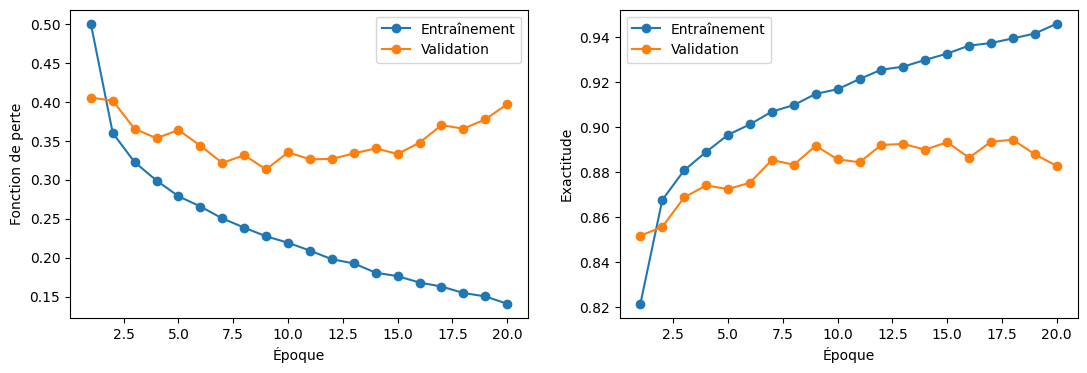

In [ ]:
plot_loss_accuracy()

On remarque que le mod√®le commence √† souffrir de surapprentissage : la performance sur le jeu de validation stagne assez vite, tandis qu'elle continue sans cesse de s'am√©liorer sur le jeu d'entra√Ænement.

Les m√©thodes `validate_step()` et `test_step()` permettent √©galement d'appeler les m√©thodes `validate()` et `test()` sur les instances de `Trainer` respectivement.

La m√©thode `validate()` permet de calculer la fonction de co√ªt et la pr√©cision sur le jeu de validation (informations que l'on a d√©j√† ici puisqu'on calcule ces scores √† la fin de chaque √©poque pendant l'entra√Ænement, mais on illustre tout de m√™me son fonctionnement).

In [39]:
trainer.validate(model, dataloader_val)

Validation: |          | 0/? [00:00<?, ?it/s]

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ      Validate metric      ‚îÉ       DataLoader 0        ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ       accuracy_val        ‚îÇ    0.8950999975204468     ‚îÇ
‚îÇ         loss_val          ‚îÇ    0.3648180067539215     ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

[{'loss_val': 0.3648180067539215, 'accuracy_val': 0.8950999975204468}]

De m√™me, la m√©thode `test()` permet de calculer la fonction de co√ªt et la pr√©cision sur le jeu d'√©valuation.
N√©anmoins, nous n'avons pas de jeu d'√©valuation ici, donc nous verrons son utilisation dans d'autres notebooks.
Si on avait une variable `dataloader_test` correspondant au *dataloader* pour le jeu d'√©valuation, le code serait le suivant :
```python
trainer.test(model, dataloader_test)
```